# **Exploratory Data Analysis**

This EDA will analysis will explore the dataset provided whilst attempting to answer the research questions.

#### **Importing Packages**

In [342]:
## This notebook will be used to analyze data from the new_heart_file.csv

import pandas as pd
import numpy as np
import seaborn as sns
import os 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
#from .. import project_functions - invalid syntax

%matplotlib inline


## **Research Questions** 

1. Are women more likely than men to have a heart attack?
2. Do higher cholesterol levels increase the chances of a heart attack occuring?
3. What variable relationships result in a heart attack?

#### **Loading the Dataframe**

In [343]:
df = pd.read_csv('new_heart_file.csv')


In [344]:
df.head()

,Unnamed: 0,Age,Sex,Chest Pain,Resting bp(mmHg),Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Result
0,111,57,1,2,150,126,1,1,173,1
1,301,57,1,0,130,131,0,1,115,0
2,53,44,0,2,108,141,0,1,175,1
3,151,71,0,0,112,149,0,1,125,1
4,267,49,1,2,118,149,0,0,126,0


In [345]:
df.shape
# 303 rows and 10 columns

(303, 10)

#### Rows = 303
#### Columns = 14

In [346]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Chest Pain', 'Resting bp(mmHg)',
       'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG', 'Max Heart Rate',
       'Result'],
      dtype='object')

In [347]:
df.nunique()

Unnamed: 0             303
Age                     41
Sex                      2
Chest Pain               4
Resting bp(mmHg)        49
Cholesterol            152
Fasting Blood Sugar      2
Resting ECG              3
Max Heart Rate          91
Result                   2
dtype: int64

In [348]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,Unnamed: 0,Age,Sex,Chest Pain,Resting bp(mmHg),Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Result
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.544554
std,87.612784,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.498835
min,0.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000
25%,75.500000,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000
50%,151.000000,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,1.000000
75%,226.500000,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000
max,302.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000


In [349]:
# The removed column "Unnamed: 0" is still present in the dataframe
#need to get rid of it 

df["Chest Pain"]

0      2
1      0
2      2
3      0
4      2
      ..
298    0
299    0
300    0
301    2
302    2
Name: Chest Pain, Length: 303, dtype: int64

In [350]:
# set numeric data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           303 non-null    int64
 1   Age                  303 non-null    int64
 2   Sex                  303 non-null    int64
 3   Chest Pain           303 non-null    int64
 4   Resting bp(mmHg)     303 non-null    int64
 5   Cholesterol          303 non-null    int64
 6   Fasting Blood Sugar  303 non-null    int64
 7   Resting ECG          303 non-null    int64
 8   Max Heart Rate       303 non-null    int64
 9   Result               303 non-null    int64
dtypes: int64(10)
memory usage: 23.8 KB


### **Cleaning and Grouping Data**

In [351]:
df.groupby(by='Age')
df.agg([np.mean])

,Unnamed: 0,Age,Sex,Chest Pain,Resting bp(mmHg),Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Result
mean,151.0,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.544554


##### The **mean** age of patients is 54.

In [352]:
df['Result']= df['Result'].map({1:'yes', 0:'no'})
df['Chest Pain'] = df['Chest Pain'].map({0:'Non-Anginal Pain',2:'Typical Angina'})


##### Changed the outputs from in columns Result and Chest Pain in order for the reader to more clearly understand the information.
**Typical Angina**: Sub-sternal chest pain caused by physical exertion or emotional stress

In [353]:
df.groupby(by='Sex').size()
#this separates out the men and the women.
# 0 = female
# 1 = male

Sex
0     96
1    207
dtype: int64

#### Sex of patients is separated into female and male

##### Female = 0
##### Male = 1

In [354]:
quotient = 207 / 302
percent = quotient*100
print(percent)

68.54304635761589


There are **302** patients in this study, 96 are women and 207 are men. This means that **68.543%** of patients are men. For obvious reasons we can assume that there will be a higher number of male patients experiencing a heart attack than female patients. 

In [355]:
df.head()

,Unnamed: 0,Age,Sex,Chest Pain,Resting bp(mmHg),Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Result
0,111,57,1,Typical Angina,150,126,1,1,173,yes
1,301,57,1,Non-Anginal Pain,130,131,0,1,115,no
2,53,44,0,Typical Angina,108,141,0,1,175,yes
3,151,71,0,Non-Anginal Pain,112,149,0,1,125,yes
4,267,49,1,Typical Angina,118,149,0,0,126,no


### **Data Visualizations**


Text(0.5, 1.0, 'Count of Heart Attack Per Sex')

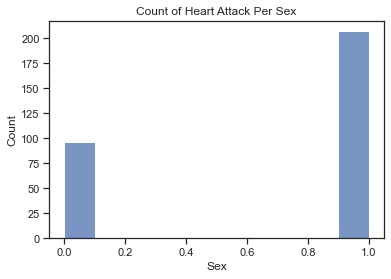

In [365]:
ax = sns.histplot (data = df, x="Sex",stat="count", palette="magma")
ax.set_title ("Count of Heart Attack Per Sex")
# Figure showing that there were obviously more men in this study

##### Figure 1. Displays the number of heart attacks occuring between male and female patients. With heart attacks resulting more frequently in male patients at **>100**.

<AxesSubplot:title={'center':'Occurence of Heart Attacks Per Sex'}, xlabel='Result', ylabel='count'>

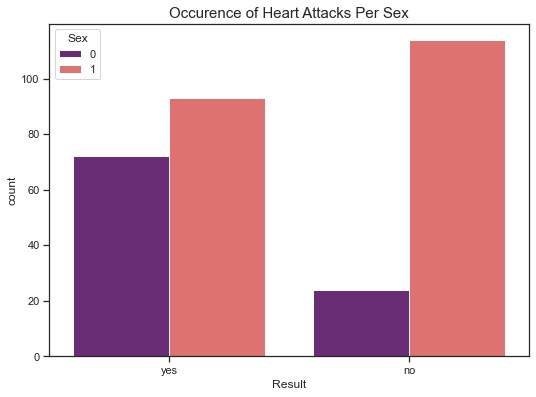

In [367]:
plt.figure(figsize=(20,30))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.subplot(4,2,1)
plt.title('Occurence of Heart Attacks Per Sex',fontsize=15)
sns.countplot(data = df, x='Result', hue= 'Sex', palette = 'magma')

Figure 2. Countplot displaying the prevalence of heart attack results for the sexes. 

<AxesSubplot:title={'center':' Chest Pain by Sex'}, xlabel='Chest Pain', ylabel='count'>

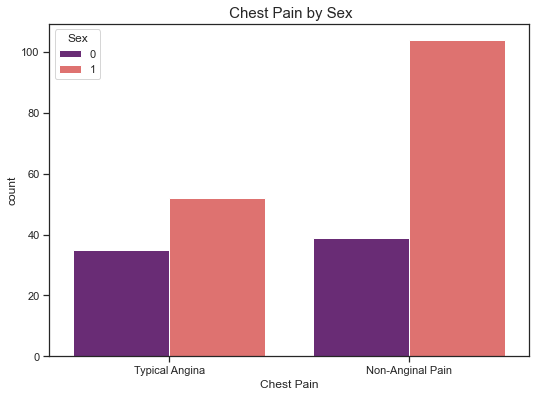

In [358]:
plt.figure(figsize=(20,30))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.subplot(4,2,1)
plt.title(' Chest Pain by Sex',fontsize=15)
sns.countplot(data= df, x="Chest Pain", hue='Sex', palette= "magma")

##### Figure 3. Countplot exhibiting the type of chest pain felt by the patients. Male patients experienced more of typical angina

#####

<AxesSubplot:title={'center':' Fasting Blood Sugar by Sex'}, xlabel='Fasting Blood Sugar', ylabel='count'>

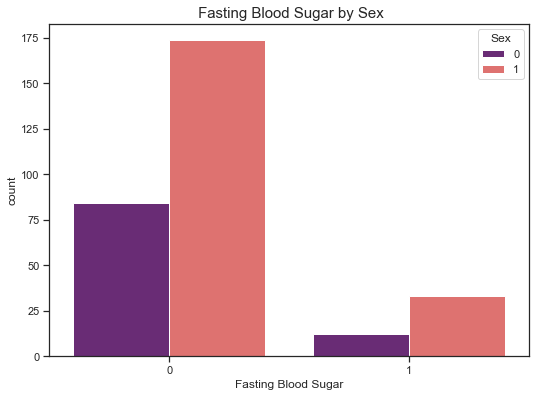

In [359]:
plt.figure(figsize=(20,30))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.subplot(4,2,1)
plt.title(' Fasting Blood Sugar by Sex',fontsize=15)
sns.countplot(data= df, x="Fasting Blood Sugar", hue='Sex', palette= "magma")

Text(0.5, 1.0, 'The Number of Patients Experiencing Chest Pain vs their Cholesterol')

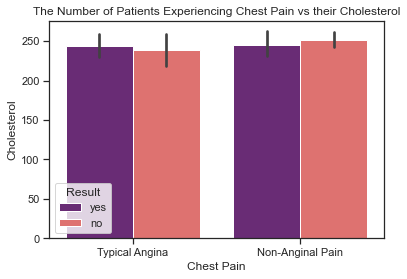

In [368]:
a = sns.barplot(data=df,x="Chest Pain", y="Cholesterol", hue="Result",
               palette="magma")
plt.title('The Number of Patients Experiencing Chest Pain vs their Cholesterol')

Text(0.5, 1.0, 'Result of Heart Attack Due to Cholesterol Level')

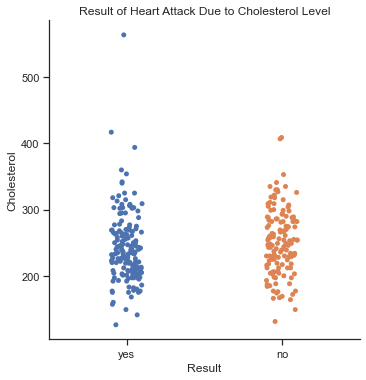

In [374]:
df1 = sns.catplot(data=df, x="Result",y="Cholesterol")
plt.title('Result of Heart Attack Due to Cholesterol Level')

##### Figure 5. Plot showing the comparison of patient cholesterol levels and whether or not they experienced a heart attack.

From this plot it is hard to draw any conclusions about cholesterol and the effect it has on a patient having a heart attack; the values look very similar other than a few outliers.

Text(0.5, 1.0, 'Density of Cholesterol Levels Per Sex')

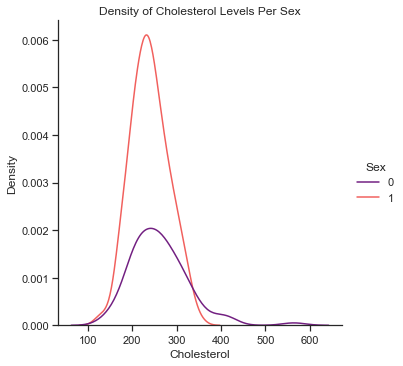

In [370]:
sns.displot(df, x = "Cholesterol", hue="Sex", kind="kde", palette="magma")
plt.title('Density of Cholesterol Levels Per Sex')

##### Figure 6. Density plot of Cholesterol levels per Sex.

Text(0.5, 1.0, 'Cholesterol Level by Sex')

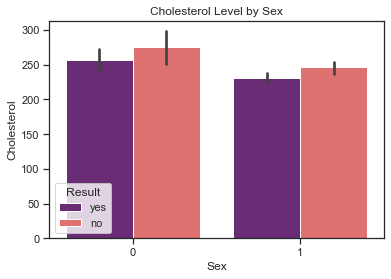

In [371]:
a = sns.barplot(data=df,x="Sex", y="Cholesterol", hue="Result",
               palette="magma")
plt.title('Cholesterol Level by Sex')

##### Figure 7. Barplot showing the cholesterol levels of patients by sex.

### **Analyzing Outliers**

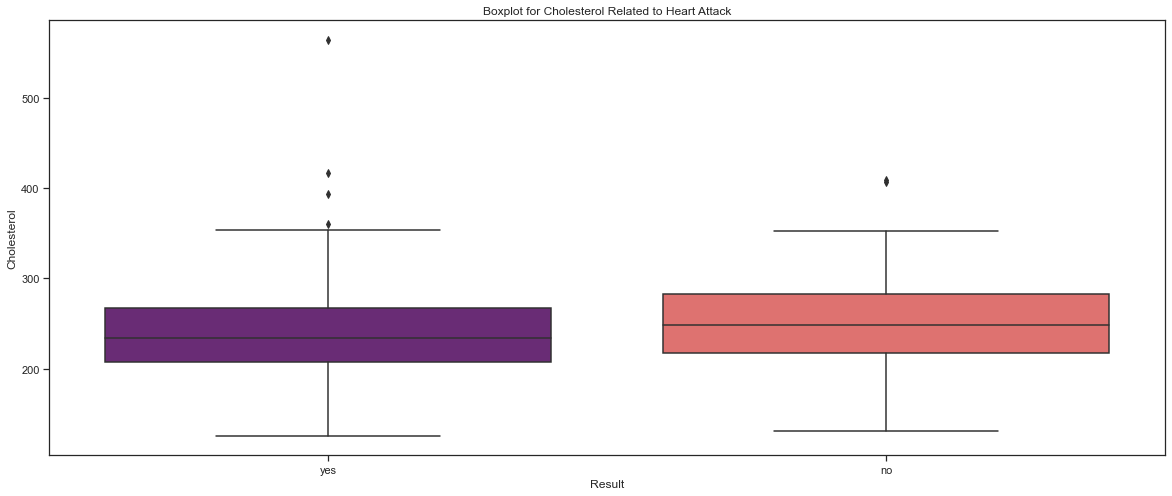

In [373]:
#Effect of Cholesterol on the Result of a Heart Attack
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="Result",y="Cholesterol",data=df, palette="magma")
plt.title('Boxplot for Cholesterol Related to Heart Attack')
plt.show()


##### Figure 8. Boxplot showing the result of heart attacks related to cholesterol.

## **Conclusion**

Overall, the study revealed that female patients experience lesser heart attacks than their male counterparts. However, it is important to consider that that 68% of the patients in the study were male, which suggests that the results may be biased. Additionally, there was no siginificant data to conclude that increased cholesterol levels resulted in a heart attack. Moreover, male patients also experienced more non-typical angina, which leads to the conclusion that female patients who are less prone to heart attacks have more active lifestyles.